# Mobile Price Classification

Kaggle dataset classification problem with problem statement below:

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data

In [96]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [97]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [98]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [99]:
train.shape, test.shape

((2000, 21), (1000, 21))

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [102]:
for col_name in train.columns:
    print(col_name, end=': ')
    print(train[col_name].value_counts().count())

battery_power: 1094
blue: 2
clock_speed: 26
dual_sim: 2
fc: 20
four_g: 2
int_memory: 63
m_dep: 10
mobile_wt: 121
n_cores: 8
pc: 21
px_height: 1137
px_width: 1109
ram: 1562
sc_h: 15
sc_w: 19
talk_time: 19
three_g: 2
touch_screen: 2
wifi: 2
price_range: 4


In [103]:
train[col_name].value_counts().count()

4

Classify the price range of the phone using features of the phone. This variable is in the training dataset but not the testing dataset.

## EDA

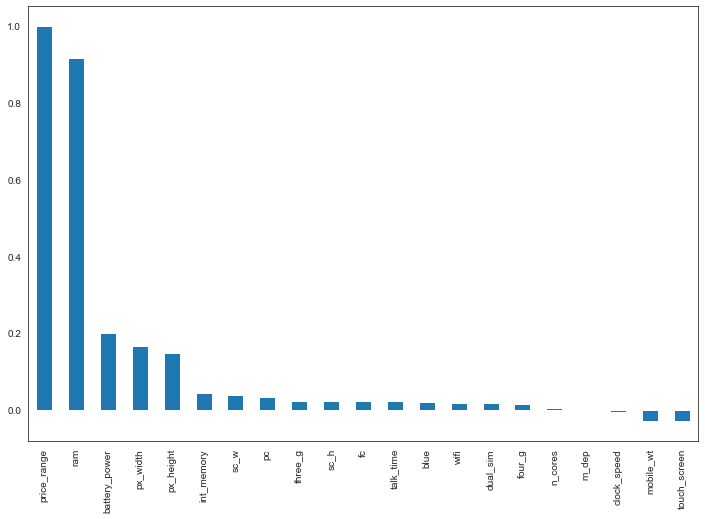

In [104]:
share_correlation = train.corr()['price_range'].sort_values(ascending=False)

with sns.axes_style("white"):
    plt.figure(figsize=(12,8))
    share_correlation.plot.bar()
    plt.show()

In [105]:
share_correlation

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

<ipython-input-106-0a8e52f7508f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(col_name)


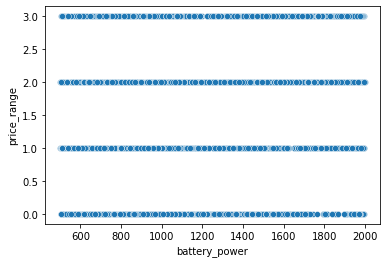

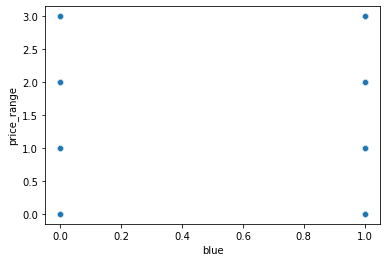

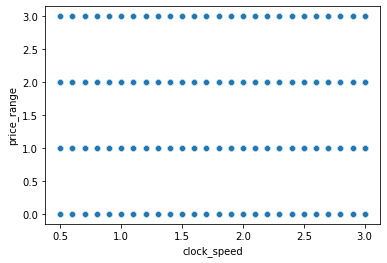

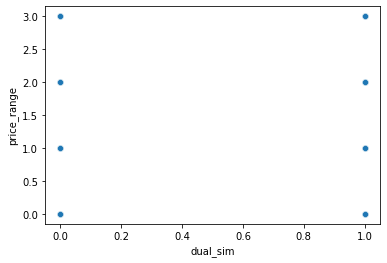

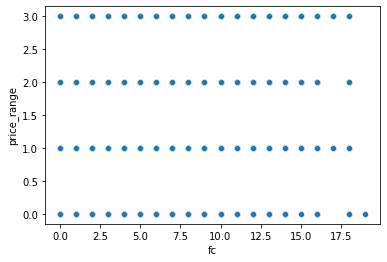

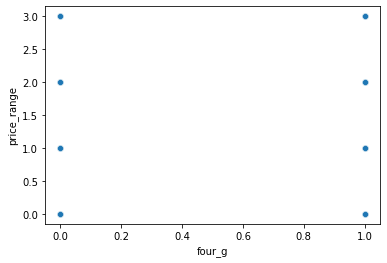

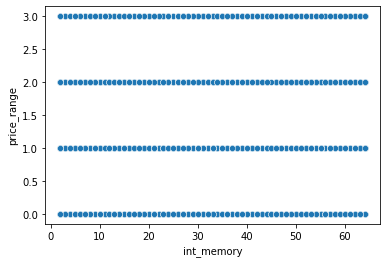

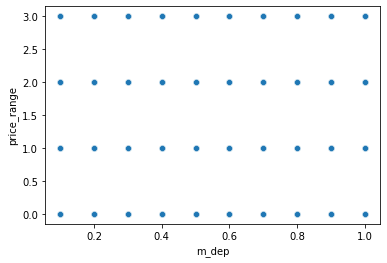

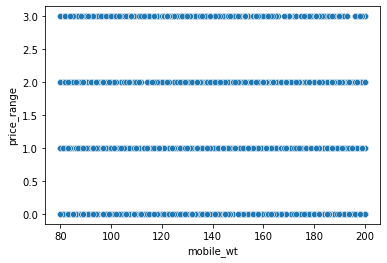

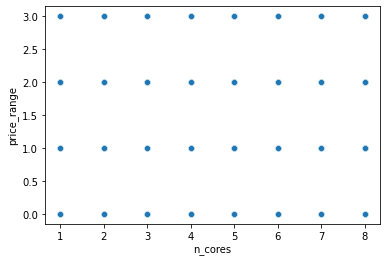

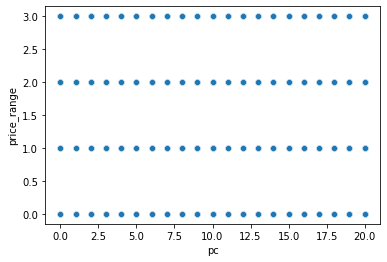

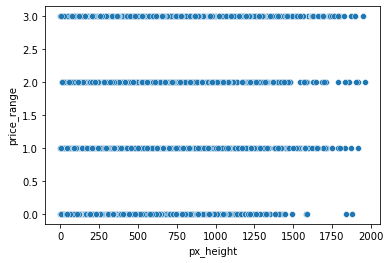

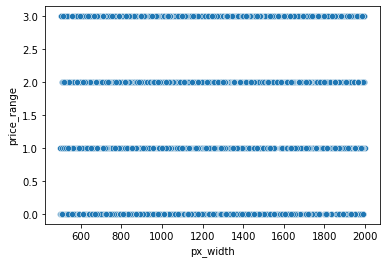

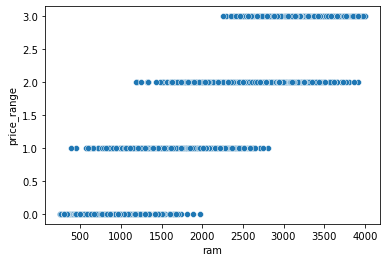

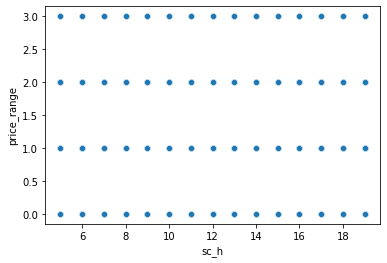

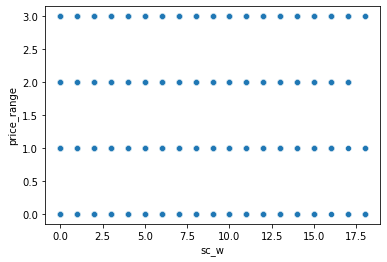

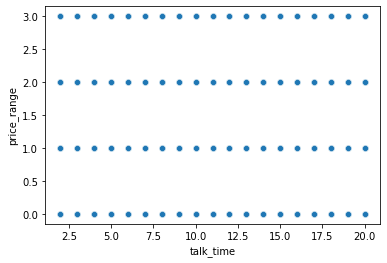

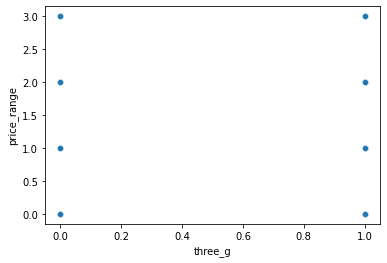

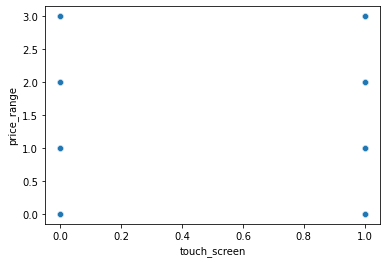

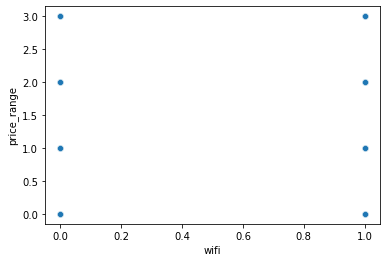

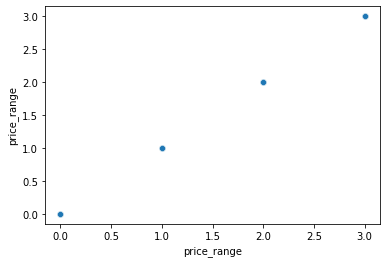

In [106]:
for col_name in train.columns:
    plt.figure(col_name)
    sns.scatterplot(x=col_name, y='price_range', data=train)

In [107]:
train['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

## ML

Split training data into train and test and see how good the model is and then make predictions on the test set...


In [108]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [109]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [110]:
test.set_index('id', inplace=True)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


split train into training and testing and see best performing model, then apply to the actual training dataset

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train = train.iloc[:, :-1] # everything but price range
y_train = train.iloc[:, -1] # price range

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression().fit(X_train, y_train)
prediction = model.predict(X_test)

C:\Users\Abdulkadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
prediction[:5]

array([0, 3, 0, 0, 0], dtype=int64)

In [117]:
y_test[:5]

1892    0
879     3
1183    0
1436    0
1896    0
Name: price_range, dtype: int64

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(prediction, y_test)

0.6075

In [120]:
mymodels = {"Logistic":LogisticRegression(),
            "Neighbour": KNeighborsClassifier(),
            "Sherlock": GaussianNB(),
            "DTree1": DecisionTreeClassifier(max_depth=100),
            "DTree2": DecisionTreeClassifier(max_depth=10),
            "RF1": RandomForestClassifier(n_estimators=25),
            "RF2": RandomForestClassifier(n_estimators=50),
            "SVM": LinearSVC()
            }

In [121]:
for model_name, model in mymodels.items():
    print(model_name, end=": ")
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    print(accuracy*100, end="%\n")

Logistic: 60.75000000000001%
Neighbour: 94.75%
Sherlock: 83.25%
DTree1: 86.5%
DTree2: 85.75%
RF1: 85.0%
RF2: 

C:\Users\Abdulkadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


85.0%
SVM: 61.0%


C:\Users\Abdulkadir\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


KNN performs the best therefore will use this to predict

In [122]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['prediction'], index=X_test.index)
train['pred_price_range'] = y_pred

In [123]:
train[~train['pred_price_range'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pred_price_range
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1654,1067,17,1,10,1,0,0,1,1.0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1224,513,19,10,12,1,0,0,0,0.0
13,803,1,2.1,0,7,0,17,1.0,198,4,...,1440,2680,7,1,4,1,0,1,2,2.0
18,1131,1,0.5,1,11,0,49,0.6,101,5,...,878,1835,19,13,16,1,1,0,1,1.0
34,644,1,2.7,0,0,0,22,0.7,157,8,...,881,1262,12,1,15,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1906,1,1.9,1,3,0,55,0.2,113,3,...,629,1871,13,5,4,1,0,1,1,1.0
1972,1191,0,0.8,0,6,1,46,0.8,89,6,...,807,824,19,18,7,1,0,0,0,0.0
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,1167,2216,9,5,6,1,0,0,1,1.0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,1426,296,5,3,7,1,0,0,0,0.0


In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, annot=True, annot_kws={'size':20}, fmt='g')
    else:
        sns.heatmap(cm)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

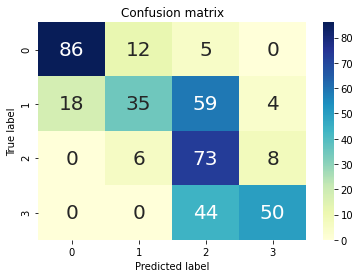

In [126]:
cm = confusion_matrix(y_test, prediction)
cm_norm = cm 
plot_confusion_matrix(cm_norm, classes = knn.classes_, title='Confusion matrix')

In [127]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.94      0.95      0.94       116
           2       0.90      0.92      0.91        87
           3       0.98      0.94      0.96        94

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### Applying to test data

In [76]:
X_test = test.iloc[:]

In [77]:
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [78]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['prediction'], index=X_test.index)
test['pred_price_range'] = y_pred

In [79]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,pred_price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
2,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
4,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


<AxesSubplot:xlabel='ram', ylabel='price_range'>

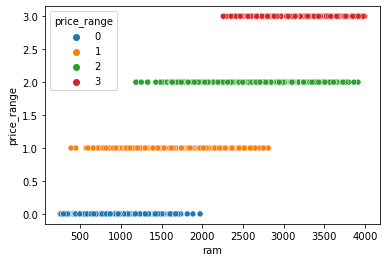

In [80]:
sns.scatterplot(x='ram', y='price_range', hue='price_range', palette='tab10', data=train)

<AxesSubplot:xlabel='ram', ylabel='pred_price_range'>

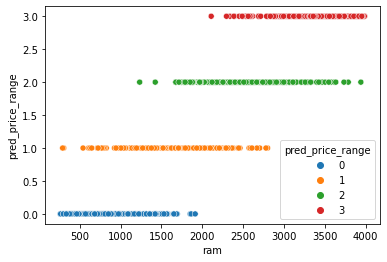

In [81]:
sns.scatterplot(x='ram', y='pred_price_range', hue='pred_price_range', palette='tab10', data=test)

In [82]:
y_pred.value_counts()

prediction
3             262
0             258
2             252
1             228
dtype: int64

***END***